### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix





### Reading data

In [2]:
# Load the dataset into a pandas DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


train = train_df.iloc[: ,1:]
test = test_df.iloc[: ,1:]


# Check for missing values
print(train.isna().sum())
print('------------------')
print(test.isna().sum())

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      16
Albumin           0
Copper            1
Alk_Phos          0
SGOT              0
Tryglicerides    16
Platelets         4
Prothrombin       0
Stage             0
dtype: int64
------------------
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol       9
Albumin           0
Copper            1
Alk_Phos          0
SGOT              0
Tryglicerides    11
Platelets         0
Prothrombin       0
dtype: int64


In [3]:
train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,980,D,D-penicillamine,18713,F,N,Y,Y,N,6.7,561.0,5.610,154.5,1468.50,192.975,150.0,399.0,16.65,4
1,1455,C,Placebo,12398,F,N,Y,N,N,1.3,456.0,5.280,145.5,2433.00,106.500,253.5,382.5,14.25,4
2,216,D,Placebo,19246,F,Y,Y,Y,N,24.5,1638.0,5.025,349.5,5610.00,220.875,648.0,598.5,22.80,4
3,2216,C,Placebo,19221,F,N,Y,Y,N,0.7,201.6,3.208,8.8,968.00,58.280,46.4,247.2,7.60,2
4,1701,C,D-penicillamine,11485,F,N,N,N,N,1.1,403.2,4.488,57.6,987.60,100.800,129.6,290.4,11.64,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,859,D,Placebo,17031,F,N,N,Y,Y,22.5,1118.4,3.744,114.0,6475.20,293.880,159.6,198.0,13.92,3
196,1967,C,Placebo,13486,F,N,N,N,N,0.7,258.0,4.020,49.2,774.00,111.600,88.8,198.0,11.52,3
197,2224,D,D-penicillamine,14754,F,N,Y,Y,N,0.8,394.8,4.200,58.8,9147.36,151.704,148.8,385.2,12.72,3
198,2294,C,Placebo,15009,F,N,Y,N,N,0.6,352.5,4.800,39.0,2637.00,160.425,100.5,342.0,16.20,4


In [4]:
test

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2576,C,Placebo,17323,F,N,N,N,N,0.5,379.2,4.380,81.6,2059.2,225.060,85.2,427.2,11.76
1,3445,C,Placebo,23445,M,N,Y,Y,N,0.6,378.0,5.745,61.5,1264.5,97.650,124.5,504.0,17.10
2,1690,D,D-penicillamine,16374,F,N,N,Y,N,3.9,420.0,3.864,145.2,1521.6,327.360,277.2,324.0,11.52
3,2221,C,Placebo,13535,F,N,Y,N,N,0.5,119.2,3.232,181.6,478.4,42.160,45.6,132.8,7.92
4,2178,C,D-penicillamine,18337,F,N,N,Y,N,0.5,480.0,4.080,10.8,1360.8,115.320,66.0,427.2,12.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4453,C,Placebo,12307,F,N,Y,Y,N,2.1,NaN,5.310,183.0,13167.0,85.140,NaN,516.0,16.50
105,2468,CL,Placebo,17233,F,N,Y,N,N,1.3,474.0,5.265,112.5,1743.0,220.875,205.5,357.0,15.00
106,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,196.8,2.864,19.2,637.6,72.800,90.4,230.4,8.32
107,1435,CL,D-penicillamine,12035,F,N,Y,N,N,2.1,580.5,5.655,94.5,2419.5,225.525,49.5,277.5,15.15


### Data exploration and visualisation

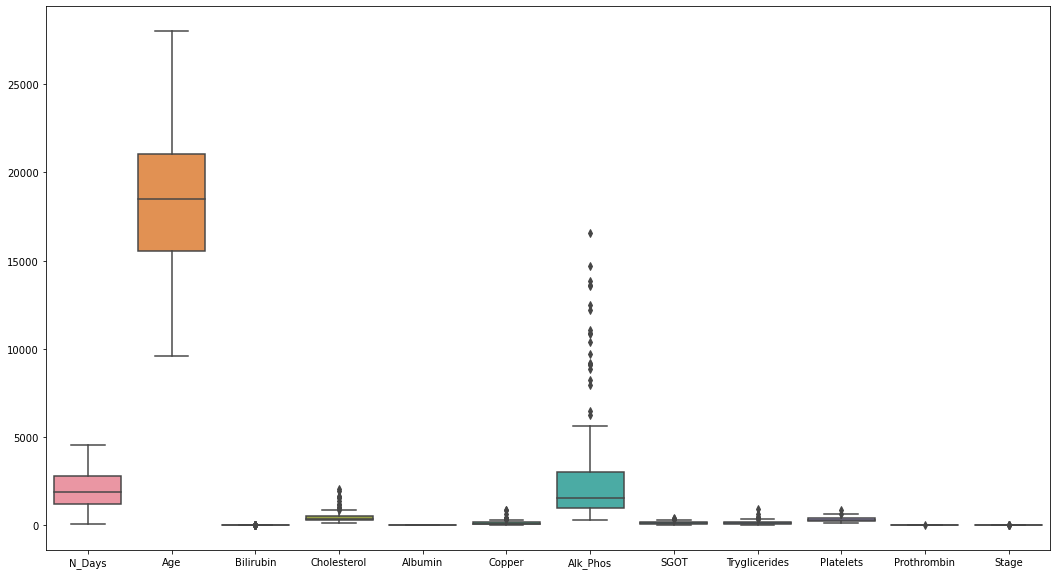

3    81
4    70
2    41
1     8
Name: Stage, dtype: int64


In [5]:
#Created a boxplot for each numerical column to check for outliers
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=train, ax=ax)
plt.show()

print(train['Stage'].value_counts())

### Data cleaning

In [3]:
# Convert binary variables to numerical values
binary_vars = ["Ascites", "Hepatomegaly", "Spiders", "Edema"]
train[binary_vars] = train[binary_vars].replace({"N": 0, "Y": 1})

# Convert ordinal variable "Edema" to numerical values
edema_map = {"N": 0, "S": 1, "Y": 2}
train["Edema"] = train["Edema"].replace(edema_map)

# Convert "Status" to numerical values
status_map = {"C": 0, "CL": 1, "D": 2}
train["Status"] = train["Status"].replace(status_map)

# Convert "Drug" to numerical values
drug_map = {"Placebo": 0, "D-penicillamine": 1}
train["Drug"] = train["Drug"].replace(drug_map)

# Convert "Sex" to numerical values
sex_map = {"F": 0, "M": 1}
train["Sex"] = train["Sex"].replace(sex_map)



# Convert binary variables to numerical values
binary_vars = ["Ascites", "Hepatomegaly", "Spiders", "Edema"]
test[binary_vars] = test[binary_vars].replace({"N": 0, "Y": 1})

# Convert ordinal variable "Edema" to numerical values
edema_map = {"N": 0, "S": 1, "Y": 2}
test["Edema"] = test["Edema"].replace(edema_map)

# Convert "Status" to numerical values
status_map = {"C": 0, "CL": 1, "D": 2}
test["Status"] = test["Status"].replace(status_map)

# Convert "Drug" to numerical values
drug_map = {"Placebo": 0, "D-penicillamine": 1}
test["Drug"] = test["Drug"].replace(drug_map)

# Convert "Sex" to numerical values
sex_map = {"F": 0, "M": 1}
test["Sex"] = test["Sex"].replace(sex_map)



# Fill missing values with the median for the respective feature
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)


# Calculate the Z-scores for all the columns
z_scores = np.abs(stats.zscore(train))
# Set a threshold for the Z-score to identify outliers
threshold = 3.5
# Get the indices of the rows that contain outliers
outliers_indices = np.where(np.any(z_scores > threshold, axis=1))
# Remove the outliers from the dataset
train_clean = train.drop(outliers_indices[0], axis=0).reset_index(drop=True)


print(f'Shape after cleaning: {train_clean.shape}')


# Check for missing values after filling missing values 
# Check for distrubution of the "Stage" after cleaning
print(train_clean.isna().sum())
print('------------------')
print(test.isna().sum())
print(train_clean['Stage'].value_counts())

Shape after cleaning: (182, 19)
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
------------------
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64
3    72
4    62
2    40
1     8
Name: Stage, dtype: int64


In [4]:
train_clean

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,980,2,1,18713,0,0,1,1,0,6.7,561.0,5.610,154.5,1468.50,192.975,150.0,399.0,16.65,4
1,1455,0,0,12398,0,0,1,0,0,1.3,456.0,5.280,145.5,2433.00,106.500,253.5,382.5,14.25,4
2,2216,0,0,19221,0,0,1,1,0,0.7,201.6,3.208,8.8,968.00,58.280,46.4,247.2,7.60,2
3,1701,0,1,11485,0,0,0,0,0,1.1,403.2,4.488,57.6,987.60,100.800,129.6,290.4,11.64,3
4,1770,0,1,25006,0,0,1,1,0,1.1,369.0,5.025,174.0,1386.00,169.725,135.0,475.5,15.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,3853,2,0,19025,0,0,0,0,0,0.8,220.8,2.880,43.2,3465.60,79.464,114.4,218.4,8.48,2
178,1967,0,0,13486,0,0,0,0,0,0.7,258.0,4.020,49.2,774.00,111.600,88.8,198.0,11.52,3
179,2224,2,1,14754,0,0,1,1,0,0.8,394.8,4.200,58.8,9147.36,151.704,148.8,385.2,12.72,3
180,2294,0,0,15009,0,0,1,0,0,0.6,352.5,4.800,39.0,2637.00,160.425,100.5,342.0,16.20,4


In [5]:
test

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2576,0,0,17323,0,0,0,0,0,0.5,379.2,4.380,81.6,2059.2,225.060,85.20,427.2,11.76
1,3445,0,0,23445,1,0,1,1,0,0.6,378.0,5.745,61.5,1264.5,97.650,124.50,504.0,17.10
2,1690,2,1,16374,0,0,0,1,0,3.9,420.0,3.864,145.2,1521.6,327.360,277.20,324.0,11.52
3,2221,0,0,13535,0,0,1,0,0,0.5,119.2,3.232,181.6,478.4,42.160,45.60,132.8,7.92
4,2178,0,1,18337,0,0,0,1,0,0.5,480.0,4.080,10.8,1360.8,115.320,66.00,427.2,12.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,4453,0,0,12307,0,0,1,1,0,2.1,378.6,5.310,183.0,13167.0,85.140,124.65,516.0,16.50
105,2468,1,0,17233,0,0,1,0,0,1.3,474.0,5.265,112.5,1743.0,220.875,205.50,357.0,15.00
106,1153,0,1,22347,0,0,1,0,0,0.4,196.8,2.864,19.2,637.6,72.800,90.40,230.4,8.32
107,1435,1,1,12035,0,0,1,0,0,2.1,580.5,5.655,94.5,2419.5,225.525,49.50,277.5,15.15


### Data exploration after cleaning

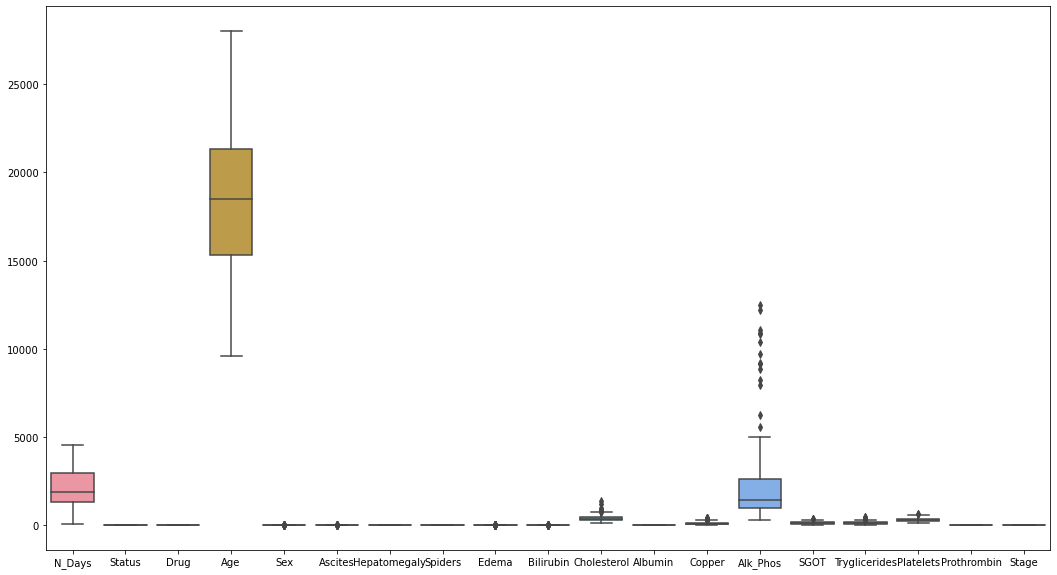

In [6]:
#Created a boxplot for each numerical column to check for outliers
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=train_clean, ax=ax)
plt.show()

### Data preprocessing

In [7]:
#Defining the target value for the modelling
X = train_clean.drop('Stage', axis=1)
y = train_clean['Stage']

In [11]:
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,980,2,1,18713,0,0,1,1,0,6.7,561.0,5.610,154.5,1468.50,192.975,150.0,399.0,16.65
1,1455,0,0,12398,0,0,1,0,0,1.3,456.0,5.280,145.5,2433.00,106.500,253.5,382.5,14.25
2,2216,0,0,19221,0,0,1,1,0,0.7,201.6,3.208,8.8,968.00,58.280,46.4,247.2,7.60
3,1701,0,1,11485,0,0,0,0,0,1.1,403.2,4.488,57.6,987.60,100.800,129.6,290.4,11.64
4,1770,0,1,25006,0,0,1,1,0,1.1,369.0,5.025,174.0,1386.00,169.725,135.0,475.5,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,3853,2,0,19025,0,0,0,0,0,0.8,220.8,2.880,43.2,3465.60,79.464,114.4,218.4,8.48
178,1967,0,0,13486,0,0,0,0,0,0.7,258.0,4.020,49.2,774.00,111.600,88.8,198.0,11.52
179,2224,2,1,14754,0,0,1,1,0,0.8,394.8,4.200,58.8,9147.36,151.704,148.8,385.2,12.72
180,2294,0,0,15009,0,0,1,0,0,0.6,352.5,4.800,39.0,2637.00,160.425,100.5,342.0,16.20


In [12]:
y

0      4
1      4
2      2
3      3
4      4
      ..
177    2
178    3
179    3
180    4
181    3
Name: Stage, Length: 182, dtype: int64

#### Train test split

In [21]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


print(y_train.value_counts())
print("\n")
print(y_test.value_counts())

3    43
4    37
2    24
1     5
Name: Stage, dtype: int64


3    29
4    25
2    16
1     3
Name: Stage, dtype: int64


### Modelling

#### Data pipeline with kernel

Best hyperparameters: {'preprocessing__lda__n_components': 3, 'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__class_weight': 'balanced', 'classifier__C': 0.1}
              precision    recall  f1-score   support

           1       0.40      0.67      0.50         3
           2       0.93      0.81      0.87        16
           3       0.97      0.97      0.97        29
           4       0.96      0.96      0.96        25

    accuracy                           0.92        73
   macro avg       0.81      0.85      0.82        73
weighted avg       0.93      0.92      0.92        73

[[ 2  1  0  0]
 [ 3 13  0  0]
 [ 0  0 28  1]
 [ 0  0  1 24]]


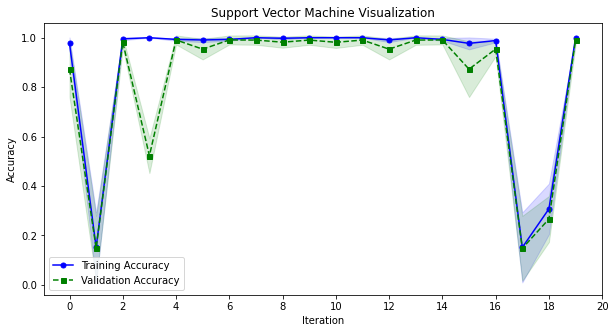

In [23]:
# Define the data preprocessing steps as a pipeline
preprocessing_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])


# Combine the preprocessing pipeline and the logistic regression classifier into a single pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', SVC())
])

# Defining the hyperparameters
hyperparameters = {
    'classifier__C': [00.1, 0.01, 0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto', 00.1, 0.1, 1, 10],
    'classifier__class_weight': ['balanced'],
    'preprocessing__lda__n_components': [3]
}


# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Perform Grid search with cross-validation
random_search_svm = RandomizedSearchCV(pipeline, hyperparameters, 
                                   cv=cv,
                                   n_iter=20,
                                   random_state=42, 
                                   return_train_score=True,
                                   error_score='raise')

random_search_svm.fit(X_train, y_train)

print("Best hyperparameters:", random_search_svm.best_params_)

y_pred = random_search_svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Get the training and test scores
train_scores = random_search_svm.cv_results_['mean_train_score']
test_scores = random_search_svm.cv_results_['mean_test_score']


# Plot the training and test scores
plt.figure(figsize=(10, 5))

plt.plot(train_scores, color = 'blue', marker='o', markersize=5 ,label='Training Accuracy')
plt.plot(test_scores, color = 'green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')

plt.fill_between(np.arange(len(train_scores)),
                 train_scores - random_search_svm.cv_results_['std_train_score'],
                 train_scores + random_search_svm.cv_results_['std_train_score'],
                 alpha=0.15, color='blue')

plt.fill_between(np.arange(len(test_scores)),
                 test_scores - random_search_svm.cv_results_['std_test_score'],
                 test_scores + random_search_svm.cv_results_['std_test_score'],
                 alpha=0.15, color='green')

plt.xlabel('Iteration')
plt.xticks(range(0, 21, 2))
plt.ylabel('Accuracy')
plt.title('Support Vector Machine Visualization')
plt.legend()
plt.show


# Apply the best parameters for prediction
y_pred_test = random_search_svm.best_estimator_.predict(test)

#### Data pipeline with regularization

Best hyperparameters: {'preprocessing__rfe__n_features_to_select': 12, 'preprocessing__pca__n_components': 14, 'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__max_iter': 5000, 'classifier__C': 10}
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.88      0.88      0.88        16
           3       0.97      0.97      0.97        29
           4       0.96      0.96      0.96        25

    accuracy                           0.92        73
   macro avg       0.78      0.78      0.78        73
weighted avg       0.92      0.92      0.92        73

[[ 1  2  0  0]
 [ 2 14  0  0]
 [ 0  0 28  1]
 [ 0  0  1 24]]


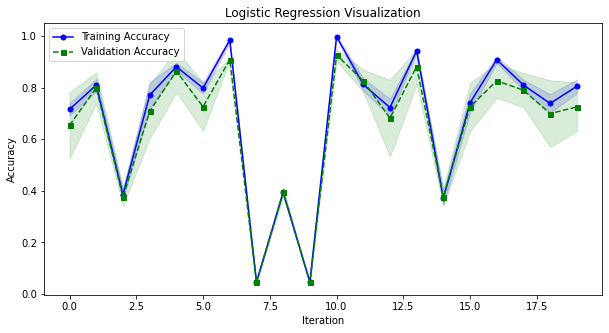

In [27]:
# Define the data preprocessing steps as a pipeline
preprocessing_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('rfe', RFE(LogisticRegression()))
])

# Combine the preprocessing pipeline and the logistic regression classifier into a single pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression())
])

# Defining the hyperparameters
hyperparameters = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'preprocessing__pca__n_components': [2, 4, 6, 8, 10, 12, 14],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [5000],
    'preprocessing__rfe__n_features_to_select': [2, 4, 6, 8, 10, 12, 14]
}

# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid search with cross-validation
random_search_lr = RandomizedSearchCV(pipeline, hyperparameters, 
                                      cv=cv,
                                      n_iter=20,
                                      random_state=42, 
                                      return_train_score=True,
                                      error_score='raise')

random_search_lr.fit(X_train, y_train)

print("Best hyperparameters:", random_search_lr.best_params_)

y_pred = random_search_lr.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))



# Get the training and test scores
train_scores = random_search_lr.cv_results_['mean_train_score']
test_scores = random_search_lr.cv_results_['mean_test_score']


# Plot the training and test scores
plt.figure(figsize=(10, 5))
plt.plot(train_scores, color = 'blue', marker='o', markersize=5 ,label='Training Accuracy')
plt.plot(test_scores, color = 'green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')

plt.fill_between(np.arange(len(train_scores)),
                 train_scores - random_search_lr.cv_results_['std_train_score'],
                 train_scores + random_search_lr.cv_results_['std_train_score'],
                 alpha=0.15, color='blue')

plt.fill_between(np.arange(len(test_scores)),
                 test_scores - random_search_lr.cv_results_['std_test_score'],
                 test_scores + random_search_lr.cv_results_['std_test_score'],
                 alpha=0.15, color='green')


plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Visualization')
plt.legend()
plt.show


# Apply the best parameters for prediction
y_pred_test = random_search_lr.best_estimator_.predict(test)

#### Other models 

Best hyperparameters: {'preprocessing__lda__n_components': 3, 'classifier__weights': 'uniform', 'classifier__p': 2, 'classifier__n_neighbors': 1, 'classifier__metric': 'manhattan', 'classifier__leaf_size': 10, 'classifier__algorithm': 'auto'}
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.88      0.94      0.91        16
           3       0.97      0.97      0.97        29
           4       0.96      0.96      0.96        25

    accuracy                           0.93        73
   macro avg       0.83      0.80      0.81        73
weighted avg       0.93      0.93      0.93        73

[[ 1  2  0  0]
 [ 1 15  0  0]
 [ 0  0 28  1]
 [ 0  0  1 24]]


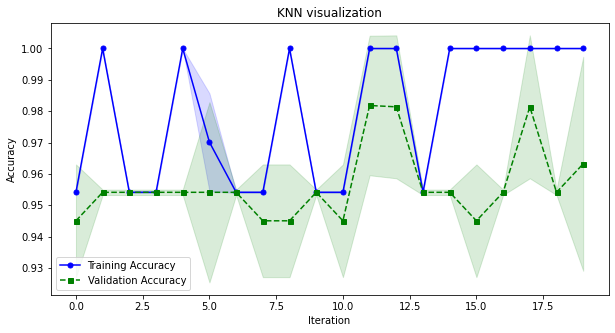

In [49]:
# Define the data preprocessing steps as a pipeline
preprocessing_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])
     
# Combine the preprocessing pipeline and the KNN classifier into a single pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', KNeighborsClassifier())
])


# Defining the hyperparameters
hyperparameters = {
    'classifier__n_neighbors': list(range(1, 31)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'preprocessing__lda__n_components': [3],
    'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'classifier__leaf_size': [10, 20, 30, 40, 50],
    'classifier__p': [1, 2, 3, 4, 5, 6]
}



# Define stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Perform Grid search with cross-validation
random_search_knn = RandomizedSearchCV(pipeline, hyperparameters, 
                                       cv=cv,
                                       n_iter=20,
                                       random_state=42, 
                                       return_train_score=True,
                                       error_score='raise')

random_search_knn.fit(X_train, y_train)

print("Best hyperparameters:", random_search_knn.best_params_)

y_pred = random_search_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Get the training and test scores
train_scores = random_search_knn.cv_results_['mean_train_score']
test_scores = random_search_knn.cv_results_['mean_test_score']


# Plot the training and test scores
plt.figure(figsize=(10, 5))
plt.plot(train_scores, color = 'blue', marker='o', markersize=5 ,label='Training Accuracy')
plt.plot(test_scores, color = 'green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')

plt.fill_between(np.arange(len(train_scores)),
                 train_scores - random_search_knn.cv_results_['std_train_score'],
                 train_scores + random_search_knn.cv_results_['std_train_score'],
                 alpha=0.15, color='blue')

plt.fill_between(np.arange(len(test_scores)),
                 test_scores - random_search_knn.cv_results_['std_test_score'],
                 test_scores + random_search_knn.cv_results_['std_test_score'],
                 alpha=0.15, color='green')


plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('KNN visualization')
plt.legend()
plt.show

# Apply the best parameters for prediction
y_pred_test = random_search_knn.best_estimator_.predict(test)